# K-Means Clustering

고객의 성별, 나이, 연간 소득, 지출 점수를 토대로 고객 군집화하기<br>
(지출 점수는 고객 행동이나 구매 데이터 등의 지표를 기반으로 할당된 것)

`scikit-learn`의 `cluster` 라이브러리

- `KMeans`: K Means Clustering 모델 생성
    - `n_clusters`: 군집(K)의 개수<br>
    - `n_jobs`: 학습 수행을 위한 CPU 코어 설정 (학습 속도)
    - `random_state`: seed 값 설정  
- `kmeans.inertia_`: WSS 값

<br>

`scikit-learn`의 `metrics` 라이브러리

- `silhouette_sample`: 개별 관측치의 실루엣 계수 반환
- `silhouette_score`: 실루엣 계수들의 평균 반환

In [38]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

**데이터 탐색 및 전처리**

kaggle의 Mall Customers 데이터를 확인하고 필요한 경우 전처리한다.

In [20]:
data = pd.read_csv('../input/mall-customers/Mall_Customers.csv', index_col='CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


데이터의 결측치는 없으므로 결측치 처리 없이 바로 사용가능하다.

In [7]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

분석을 용이하게 하기 위해 Annual Income과 Spending Score 변수만 사용하자.

In [21]:
data = data.iloc[:, [2, 3]].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### 1. 모델 생성 및 학습

최적의 K를 찾기 위해 Elbow Method를 사용한다.<br>
K값을 1부터 10까지 바꿔가면서 inertia 값을 확인해보자.

In [23]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)
    
wss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972]

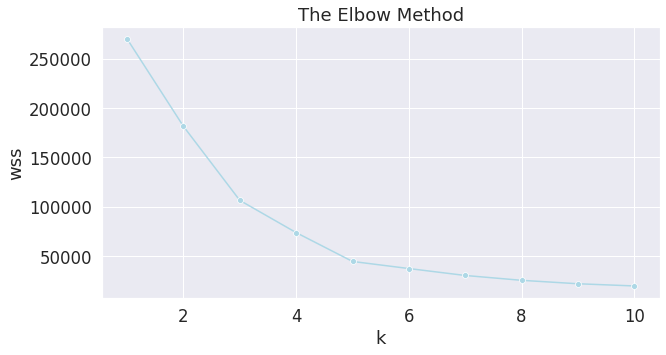

In [39]:
plt.figure(figsize=(10, 5))
sns.lineplot(range(1, 11), wss, marker='o', color='lightblue')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('wss')
plt.show()

k가 5일때 wss를 나타낸 elbow가 크게 꺾였으므로 k=5로 학습시키고 예측해보자.

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(data)
cluster

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

### 2. 결과 확인

5개의 클러스터를 시각화하여 확인해보자.<br>
0~4의 클러스터에 속한 데이터들을 색을 달리하여 산점도로 나타낸다.<br>
이 때 X축은 연간 수입, Y축은 소비 점수로 하여 나타낸다.

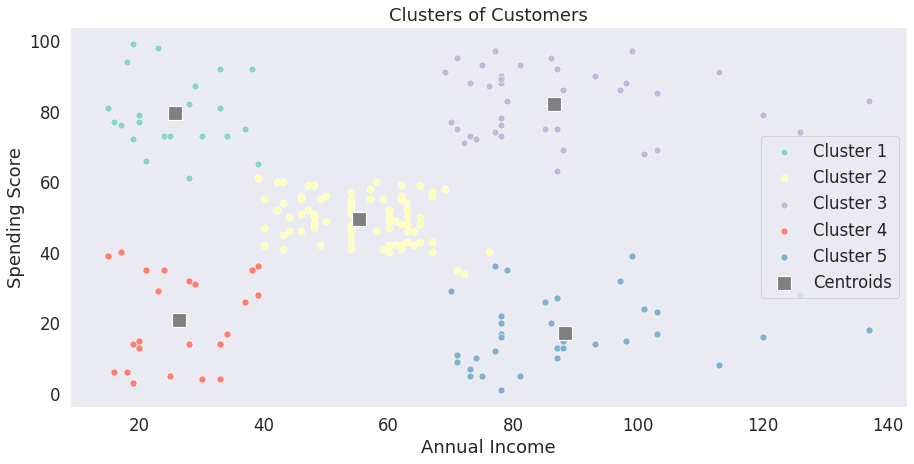

In [44]:
plt.figure(figsize=(15, 7))

sns.set_palette("Set3")
sns.scatterplot(data[cluster == 0, 0], data[cluster == 0, 1], label = 'Cluster 1', s = 50)
sns.scatterplot(data[cluster == 1, 0], data[cluster == 1, 1], label = 'Cluster 2', s = 50)
sns.scatterplot(data[cluster == 2, 0], data[cluster == 2, 1], label = 'Cluster 3', s = 50)
sns.scatterplot(data[cluster == 3, 0], data[cluster == 3, 1], label = 'Cluster 4', s = 50)
sns.scatterplot(data[cluster == 4, 0], data[cluster == 4, 1], label = 'Cluster 5', s = 50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='grey', label = 'Centroids', s = 200, marker=',')

plt.grid(False)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()